# Bias vs Variance

In this exercise, you will implement regularized linear regression and use it to
study models with different bias-variance properties.


### Visaualizing the daataset
dataset containing historical records on the change in the water level, x, and the amount of water flowing out of the dam

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.io import loadmat

In [3]:
data = loadmat('machine-learning-ex5/ex5/ex5data1.mat')
data

{'X': array([[-15.93675813],
        [-29.15297922],
        [ 36.18954863],
        [ 37.49218733],
        [-48.05882945],
        [ -8.94145794],
        [ 15.30779289],
        [-34.70626581],
        [  1.38915437],
        [-44.38375985],
        [  7.01350208],
        [ 22.76274892]]), 'Xtest': array([[-33.31800399],
        [-37.91216403],
        [-51.20693795],
        [ -6.13259585],
        [ 21.26118327],
        [-40.31952949],
        [-14.54153167],
        [ 32.55976024],
        [ 13.39343255],
        [ 44.20988595],
        [ -1.14267768],
        [-12.76686065],
        [ 34.05450539],
        [ 39.22350028],
        [  1.97449674],
        [ 29.6217551 ],
        [-23.66962971],
        [ -9.01180139],
        [-55.94057091],
        [-35.70859752],
        [  9.51020533]]), 'Xval': array([[-16.74653578],
        [-14.57747075],
        [ 34.51575866],
        [-47.01007574],
        [ 36.97511905],
        [-40.68611002],
        [ -4.47201098],
        [ 26.533

In [4]:
X = data['X']
y = data['y']

X.shape, y.shape

((12, 1), (12, 1))

Text(0,0.5,'Water flowing out of the dam(y)')

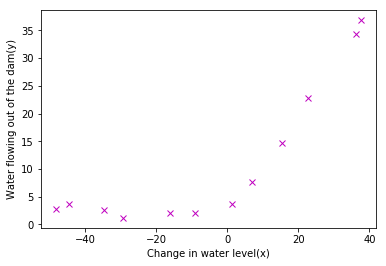

In [5]:
fig, ax = plt.subplots()
ax.plot(X, y, 'mx')
ax.set_xlabel('Change in water level(x)')
ax.set_ylabel('Water flowing out of the dam(y)')

In [6]:
# Regularized linear regression cost function
def lrCostFunction(theta, X, y, lam):
    X = np.matrix(X)
    y = np.matrix(y)
    theta = np.matrix(theta)
    
    X = np.insert(X, 0, 1, axis=1)
    
    m = len(y)
    
    h = X * theta.T
    
    theta[0,0] = 0
    
    J = (1/(2*m)) * (np.sum(np.power(h - y, 2)) + lam * (np.sum(np.power(theta, 2))))
    
    grad = (1/m) * ((X.T * (h - y)) + lam * theta.T)
    
    return J, grad

In [7]:
# Regularized linear regression cost function
def cost(theta, X, y, lam):
    X = np.matrix(X)
    y = np.matrix(y)
    theta = np.matrix(theta)
    
    X = np.insert(X, 0, 1, axis=1)
    
    m = len(y)
    
    h = X * theta.T
    
    theta[0,0] = 0
    
    J = (1/(2*m)) * (np.sum(np.power(h - y, 2)) + lam * (np.sum(np.power(theta, 2))))
    
    #grad = (1/m) * ((X.T * (h - y)) + lam * theta.T)
    
    return J

In [59]:
# Regularized linear regression gradient function
def grad(theta, X, y, lam):
    X = np.matrix(X)
    y = np.matrix(y)
    theta = np.matrix(theta)
    
    X = np.insert(X, 0, 1, axis=1)
    
    m = len(y)
    
    h = X * theta.T
    
    theta[0,0] = 0
    
    #J = (1/(2*m)) * (np.sum(np.power(h - y, 2)) + lam * (np.sum(np.power(theta, 2))))
    
    grad = (1/m) * ((X.T * (h - y)) + lam * theta.T)
    
    # to keep shape (n,) or else fmin_cg will not work
    return np.array(grad).reshape((-1,))

In [61]:
t = np.zeros(X.shape[1] + 1)

gr = grad(t, X, y, 0)
gr.shape

(2,)

In [10]:
#Fiting linear regression
import scipy.optimize as opt

initial_theta = np.zeros(X.shape[1] + 1)
lam = 0

result = opt.fmin_cg(f=cost, x0=initial_theta, fprime=grad, args=(X, y, lam))
result

Optimization terminated successfully.
         Current function value: 22.373906
         Iterations: 2
         Function evaluations: 5
         Gradient evaluations: 5


array([13.08790351,  0.36777923])

In [11]:
def predict(X, theta):
    X = np.matrix(X)
    theta = np.matrix(theta)
    
    X = np.insert(X, 0, 1, axis=1)
    
    return X * theta.T

In [12]:
data['X'].min(), data['X'].max()

(-48.058829452570066, 37.49218733199513)

Text(0,0.5,'Water flowing out of the dam(y)')

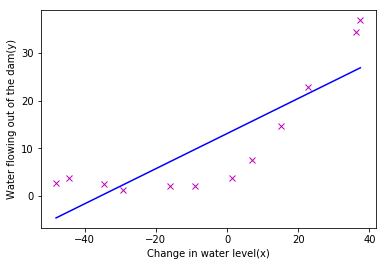

In [13]:
x = np.linspace(data['X'].min(), data['X'].max(), 100)
h = predict(np.matrix(x).T, result)

fig, ax = plt.subplots()
ax.plot(X, y, 'mx')
ax.plot(x, h, 'b-')
ax.set_xlabel('Change in water level(x)')
ax.set_ylabel('Water flowing out of the dam(y)')

In [16]:
X[:2,:], y[:2,:]

(array([[-15.93675813],
        [-29.15297922]]), array([[2.13431051],
        [1.17325668]]))

### Bias vs Variance:

In [44]:
# function to generate the train and cross validation set
# errors needed to plot a learning curve
def learningCurve(X, y, Xval, yval, lam):
    m = X.shape[0]
    initial_theta = np.zeros(X.shape[1] + 1)
    
    error_train = np.zeros(m)
    error_val = np.zeros(m)
    
    for i in range(m):
        theta = opt.fmin_cg(f=cost, x0=initial_theta, fprime=grad, args=(X[:i+1,:], y[:i+1,:], lam), disp=0)
        
        error_train[i] = cost(theta, X[:i+1,:], y[:i+1,:], 0)
        
        error_val[i] = cost(theta, Xval, yval, 0)
    
    return error_train, error_val

In [45]:
# function to plot learning curve
def drawlc(X, y, Xval, yval, lam):
    m = X.shape[0]

    error_train, error_val = learningCurve(X, y, Xval, yval, lam)

    fig, ax = plt.subplots(figsize=(12,8))
    ax.plot(range(1, m+1), error_train, 'm', label='Training error')
    ax.plot(range(1, m+1), error_val, 'g', label='Validation error')
    ax.legend()
    ax.set_xlabel('No. of training exmaples(m)')
    ax.set_ylabel('Error(J)')
    ax.set_title('Learning Curve, Jtrain & Jval vs m')

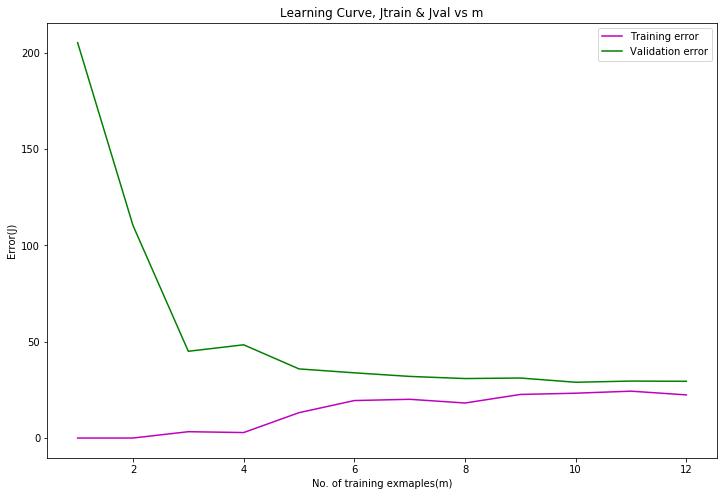

In [46]:
# Learning curve for no regularization
lam = 0

drawlc(X, y, data['Xval'], data['yval'], lam)

### Polynomial Regresssion:

In [36]:
# Add more features to address the problem of high bias
def polyFeatures(X, p):
    
    
    X_poly = np.zeros((X.shape[0], p))
    
    for i in range(p):
        X_poly[:, i] = np.power(X, i+1).ravel()
    
    return X_poly

In [43]:
# Create Polynomial features and 
# perform feature scailing and normalization
from sklearn import preprocessing

p = 8

X_poly = polyFeatures(X, p)

scaler = preprocessing.StandardScaler().fit(X_poly)

X_poly = scaler.transform(X_poly)

X_poly_test = polyFeatures(data['Xtest'], p)
X_poly_test = scaler.transform(X_poly_test)

X_poly_val = polyFeatures(data['Xval'], p)
X_poly_val = scaler.transform(X_poly_val)

X_poly.shape, X_poly_test.shape, X_poly_val.shape

((12, 8), (21, 8), (21, 8))

In [69]:
# Learning Curve for Polynomial Regression
initial_theta = np.zeros(X_poly.shape[1] + 1)
lam = 0

result2 = opt.fmin_cg(f=cost, x0=initial_theta, fprime=grad, args=(X_poly, y, lam))
result2

Optimization terminated successfully.
         Current function value: 0.028898
         Iterations: 1056
         Function evaluations: 2061
         Gradient evaluations: 2061


array([ 11.21758938,   9.1593777 ,  18.21387796,  28.65704512,
       -27.48147267, -73.71171714,   7.40324433,  60.05050937,
        20.09152933])

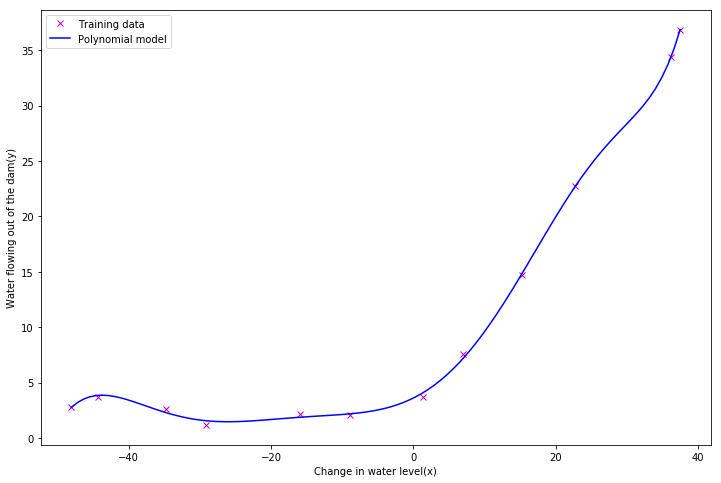

In [68]:
# function to plot data and model
def plotdm(theta):
    x = np.linspace(data['X'].min(), data['X'].max(), 100)
    x_poly = polyFeatures(np.matrix(x).T, p)
    x_poly = scaler.transform(x_poly)

    h = predict(x_poly, theta)

    fig, ax = plt.subplots(figsize=(12,8))
    ax.plot(X, y, 'mx', label='Training data')
    ax.plot(x, h, 'b-', label='Polynomial model')
    ax.legend()
    ax.set_xlabel('Change in water level(x)')
    ax.set_ylabel('Water flowing out of the dam(y)')

plotdm(result2)

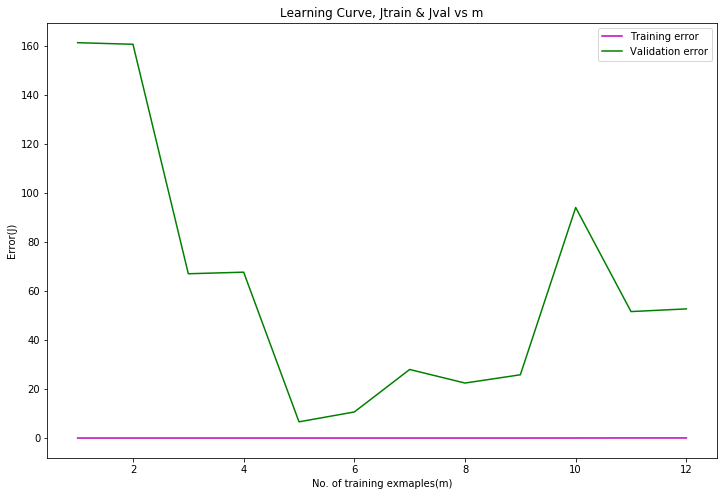

In [67]:
# Looks like it is overfitting the data
# let's draw the learning curve
lam = 0
drawlc(X_poly, y, X_poly_val, data['yval'], lam)

### Adjusting the Regularization parameter

Optimization terminated successfully.
         Current function value: 6.830463
         Iterations: 34
         Function evaluations: 62
         Gradient evaluations: 62


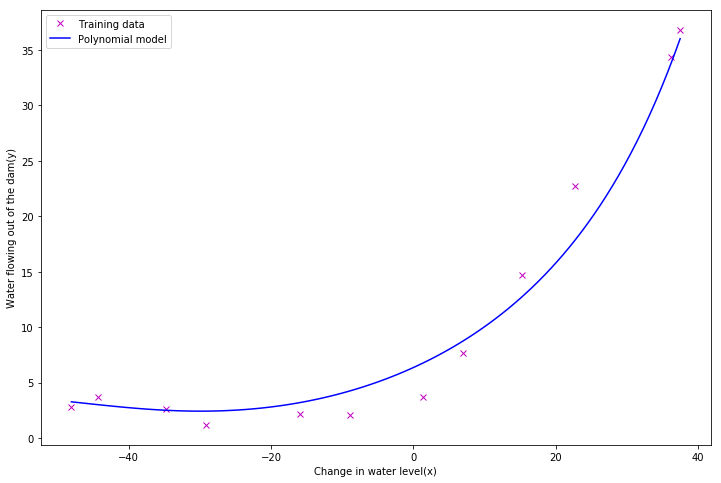

In [71]:
# Polynomial fit, lambda = 1
lam = 1
theta = opt.fmin_cg(f=cost, x0=initial_theta, fprime=grad, args=(X_poly, y, lam))
plotdm(theta)

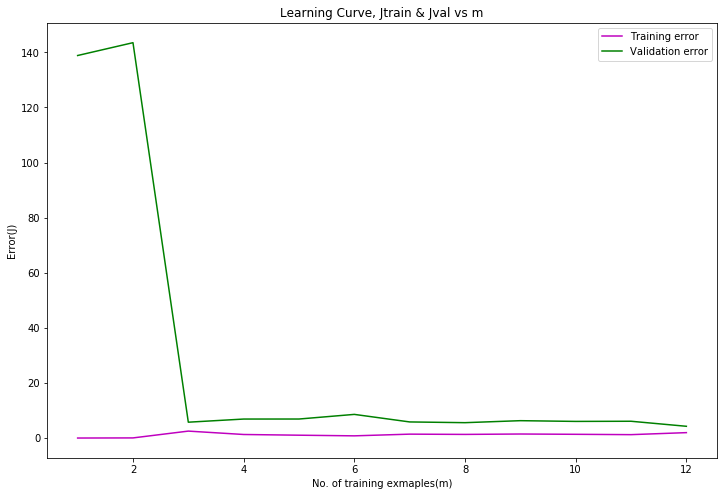

In [72]:
drawlc(X_poly, y, X_poly_val, data['yval'], lam)

Lambda = 1, achieves a good trade-off between bias and variance

Optimization terminated successfully.
         Current function value: 65.950955
         Iterations: 9
         Function evaluations: 17
         Gradient evaluations: 17


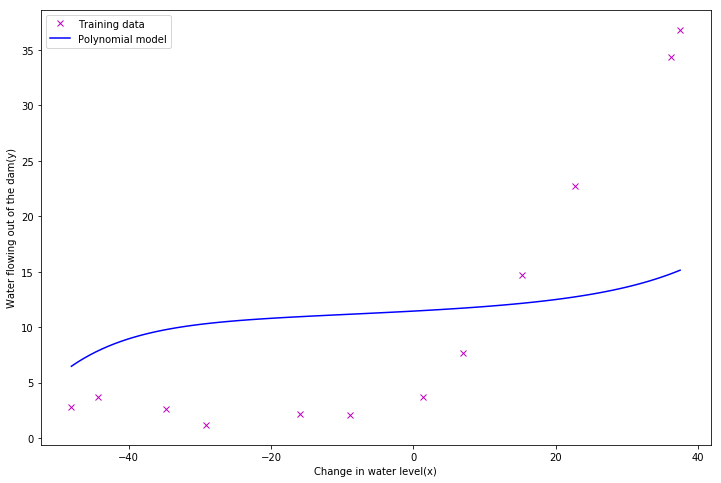

In [73]:
# high values of regularization parameter can lead to underfitting
lam = 100
theta2 = opt.fmin_cg(f=cost, x0=initial_theta, fprime=grad, args=(X_poly, y, lam))
plotdm(theta2)

The model with lambda = 100 is underfitting the training data

### Selecting λ using a cross validation set:

In [78]:
def validationCurve(X, y, Xval, yval):
    lam_vec = np.array([0, 0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1, 3, 10])
    
    error_train = np.zeros(len(lam_vec))
    error_val = np.zeros(len(lam_vec))
    
    initial_theta = np.zeros(X.shape[1] + 1)
    
    # compute Jtrain and Jval using different lam
    for i in range(len(lam_vec)):
        lam = lam_vec[i]
        
        theta = opt.fmin_cg(f=cost, x0=initial_theta, fprime=grad, args=(X, y, lam), disp=0)
        
        error_train[i] = cost(theta, X, y, lam)
        
        error_val[i] = cost(theta, Xval, yval, lam)
    
    return lam_vec, error_train, error_val

Text(0.5,1,'Jtrain & Jval vs λ')

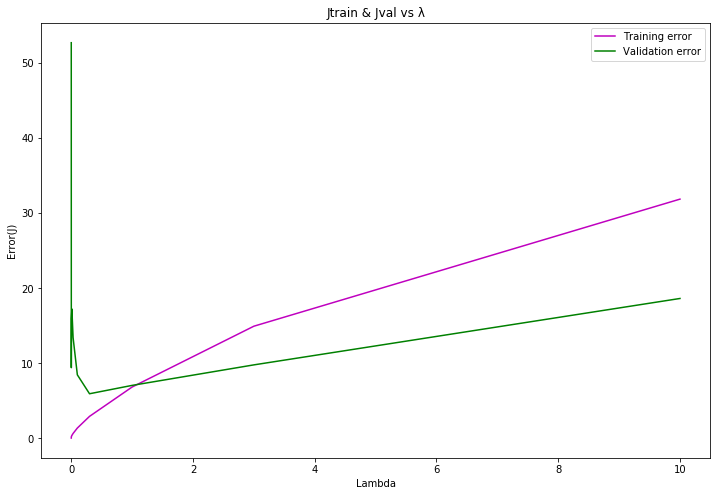

In [79]:
# plot Jtrain & Jval vs λ
lam_vec, error_train, error_val = validationCurve(X_poly, y, X_poly_val, data['yval'])

fig, ax = plt.subplots(figsize=(12,8))
ax.plot(lam_vec, error_train, 'm', label='Training error')
ax.plot(lam_vec, error_val, 'g', label='Validation error')
ax.legend()
ax.set_xlabel('Lambda')
ax.set_ylabel('Error(J)')
ax.set_title('Jtrain & Jval vs λ')

In [82]:
# λ at minimum Jval
print('Best valuee of λ is around', lam_vec[np.argmin(error_val)])

Best valuee of λ is around 0.3


### Computing test set error:

In [83]:
lam = 0.3

cost(theta, X_poly_test, data['ytest'], lam)

3.6151693403004588